# 0. Introduction to the Lending Club Dataset

* https://www.lendingclub.com/info/download-data.action

* loan.csv
> These files contain complete loan data for all loans issued through the 2007-2015, including the current loan status (Current, Late, Fully Paid, etc.) and latest payment information. The file containing loan data through the "present" contains complete loan data for all loans issued through the previous completed calendar quarter. Additional features include credit scores, number of finance inquiries, address including zip codes, and state, and collections among others. The file is a matrix of about 890 thousand observations and 67 variables. A data dictionary is provided in a separate file.

* declined loan data
> These files contain the list and details of all loan applications that did not meet Lending Club's credit underwriting policy.

## Reading List

### Plotting

* Get current axis/figure through gca/gcf and modify it
    - https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.gca
    - https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.gcf
* Tight Layout (might or might not work)
    - https://matplotlib.org/users/tight_layout_guide.html
* Tick Formattin/Placement (log axis, string/int/float tick labels)
    - https://matplotlib.org/api/ticker_api.html

### Pandas DataFrame

* DataFrame Visualization
    - https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.hist.html
    - https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.boxplot.html
* Dealing with id variables
    - https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html
* Dealing with missing variables
    - https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html
    - https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html
* Computing bins and counts (to be used by other viz libs)
    - https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html
    - https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.reset_index.html
* Pitfalls of Chain Indexing
    - http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
* Binning
    - https://pandas.pydata.org/pandas-docs/stable/generated/pandas.cut.html
    - https://chrisalbon.com/python/pandas_binning_data.html
    - https://pandas.pydata.org/pandas-docs/stable/generated/pandas.qcut.html


### Understanding Missing Value Representation

* http://www.numpy.org/NA-overview.html
* http://pandas-docs.github.io/pandas-docs-travis/gotchas.html#nan-integer-na-values-and-na-type-promotions
* https://chrisalbon.com/python/pandas_missing_data.html
* https://news.ycombinator.com/item?id=1689546


# 1. Predicting Term

## 1.1. Importing Libraries

In [1]:
%matplotlib inline
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
from scipy.stats import kendalltau
import seaborn as sns
import matplotlib

## 1.2. Reading in data


* funded_amnt
    - The total amount committed to that loan at that point in time.
* loan_amnt
    - The listed amount of the loan applied for by the borrower.
    - If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
* int_rate
    - Interest Rate on the loan
* term
    - The number of payments on the loan.
    - Values are in months and can be either 36 or 60.
* last_pymnt_amnt
    - Last total payment amount received
* last_pymnt_d
    - Last month payment was received
* loan_status
    - Current status of the loan!
* earliest_cr_line
    - The month the borrower's earliest reported credit line was opened
    

string.lstrip(s[, chars])
> Return a copy of the string with leading characters removed. If chars is omitted or None, whitespace characters are removed. If given and not None, chars must be a string; the characters in the string will be stripped from the beginning of the string this method is called on.

In [2]:
data = pd.read_csv('./loan.csv', low_memory=False)

In [3]:
data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.000000,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.000000,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.000000,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.000000,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.000000,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1075269,1311441,5000.0,5000.0,5000.000000,36 months,7.90,156.46,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1069639,1304742,7000.0,7000.0,7000.000000,60 months,15.96,170.08,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1072053,1288686,3000.0,3000.0,3000.000000,36 months,18.64,109.43,E,E1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1071795,1306957,5600.0,5600.0,5600.000000,60 months,21.28,152.39,F,F2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1071570,1306721,5375.0,5375.0,5350.000000,60 months,12.69,121.45,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 1.3 Dropping id variables

In [4]:
data['emp_title'].head(10)

0                          NaN
1                        Ryder
2                          NaN
3          AIR RESOURCES BOARD
4     University Medical Group
5         Veolia Transportaton
6    Southern Star Photography
7              MKC Accounting 
8                          NaN
9                    Starbucks
Name: emp_title, dtype: object

In [5]:
data.drop(['id', 'member_id', 'emp_title'], axis=1, inplace=True)
data.drop(['loan_status'], 1, inplace=True)
data.drop(['pymnt_plan','url','desc','title' ], 1, inplace=True)

## 1.4 Fixing *emp_length*

In [6]:
data['emp_length'].head(10)

0    10+ years
1     < 1 year
2    10+ years
3    10+ years
4       1 year
5      3 years
6      8 years
7      9 years
8      4 years
9     < 1 year
Name: emp_length, dtype: object

In [7]:
sum(data['emp_length']=='n/a')

44825

Fill in missing values:

In [8]:
data.replace('n/a', np.nan, inplace=True)
data.emp_length.fillna(value=0, inplace=True)
#data.emp_length.fillna(value=np.nan,inplace=True)

Convert to numbers:

In [9]:
data['emp_length'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)
data['emp_length'] = data['emp_length'].astype(int)

In [10]:
data['emp_length'].head(10)

0    10
1     1
2    10
3    10
4     1
5     3
6     8
7     9
8     4
9     1
Name: emp_length, dtype: int64

## 1.5 Fixing *term*

In [11]:
data['term'].head(10)

0     36 months
1     60 months
2     36 months
3     36 months
4     60 months
5     36 months
6     60 months
7     36 months
8     60 months
9     60 months
Name: term, dtype: object

In [12]:
data['term'] = data['term'].apply(lambda x: x.lstrip())

In [13]:
data['term'].head(10)

0    36 months
1    60 months
2    36 months
3    36 months
4    60 months
5    36 months
6    60 months
7    36 months
8    60 months
9    60 months
Name: term, dtype: object

## 1.6 (Statitical) Summary

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 66 columns):
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_length                     887379 non-null int64
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null object
purpose                        887379 non-null object
zip_code                       887379 non-null object
addr_state                     887379 non-null object
dti                 

In [15]:
data.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,8.873750e+05,887379.000000,887350.000000,887350.000000,...,21372.000000,18617.000000,21372.000000,21372.000000,21372.000000,21372.000000,8.171030e+05,21372.000000,21372.000000,21372.000000
mean,14755.264605,14741.877625,14702.464383,13.246740,436.717127,5.784738,7.502759e+04,18.157039,0.314442,0.694623,...,36552.811389,71.535317,1.389060,2.975482,5887.979740,60.831939,3.206862e+04,0.943945,1.537058,1.977307
std,8435.455601,8429.897657,8442.106732,4.381867,244.186593,3.695776,6.469830e+04,17.190626,0.862244,0.998448,...,43103.833619,23.022862,1.520129,2.631886,5284.701239,20.013254,3.749826e+04,1.446872,2.723339,2.874067
min,500.000000,500.000000,0.000000,5.320000,15.670000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000
25%,8000.000000,8000.000000,8000.000000,9.990000,260.705000,2.000000,4.500000e+04,11.910000,0.000000,0.000000,...,10251.500000,58.600000,0.000000,1.000000,2411.000000,47.700000,1.390000e+04,0.000000,0.000000,0.000000
50%,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.000000,6.500000e+04,17.650000,0.000000,0.000000,...,24684.500000,74.900000,1.000000,2.000000,4483.000000,61.900000,2.370000e+04,0.000000,0.000000,2.000000
75%,20000.000000,20000.000000,20000.000000,16.200000,572.600000,10.000000,9.000000e+04,23.950000,0.000000,1.000000,...,47858.000000,87.600000,2.000000,4.000000,7771.500000,75.200000,3.980000e+04,1.000000,2.000000,3.000000
max,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,10.000000,9.500000e+06,9999.000000,39.000000,33.000000,...,878459.000000,223.300000,22.000000,43.000000,127305.000000,151.400000,9.999999e+06,17.000000,35.000000,32.000000


In [16]:
np.transpose(data.describe())

,count,mean,std,min,25%,50%,75%,max
loan_amnt,887379.0,14755.264605,8435.455601,500.00,8000.000,13000.000000,20000.000000,3.500000e+04
funded_amnt,887379.0,14741.877625,8429.897657,500.00,8000.000,13000.000000,20000.000000,3.500000e+04
funded_amnt_inv,887379.0,14702.464383,8442.106732,0.00,8000.000,13000.000000,20000.000000,3.500000e+04
int_rate,887379.0,13.246740,4.381867,5.32,9.990,12.990000,16.200000,2.899000e+01
installment,887379.0,436.717127,244.186593,15.67,260.705,382.550000,572.600000,1.445460e+03
emp_length,887379.0,5.784738,3.695776,0.00,2.000,6.000000,10.000000,1.000000e+01
annual_inc,887375.0,75027.587761,64698.300142,0.00,45000.000,65000.000000,90000.000000,9.500000e+06
dti,887379.0,18.157039,17.190626,0.00,11.910,17.650000,23.950000,9.999000e+03
delinq_2yrs,887350.0,0.314442,0.862244,0.00,0.000,0.000000,0.000000,3.900000e+01
inq_last_6mths,887350.0,0.694623,0.998448,0.00,0.000,0.000000,1.000000,3.300000e+01


## 1.7 Exploring distribution of features

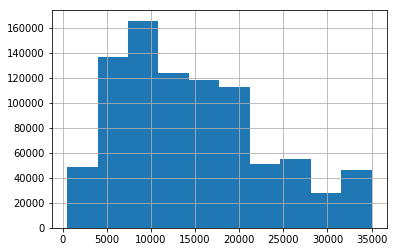

In [17]:
# data['funded_amnt'].value_counts()
data['funded_amnt'].hist(bins=10)

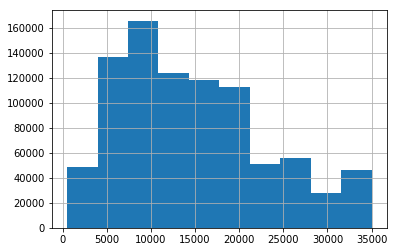

In [18]:
data['loan_amnt'].hist(bins=10)

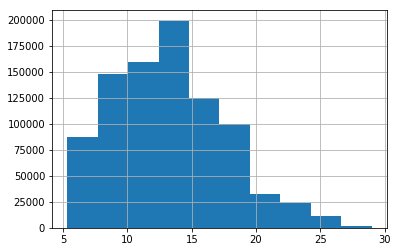

In [19]:
data['int_rate'].hist(bins=10)

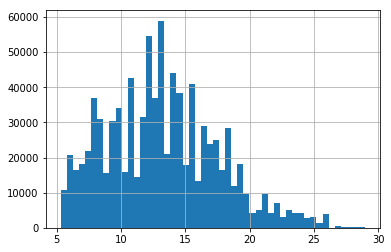

In [20]:
data['int_rate'].hist(bins=50)
# seems like most are concentrated between 10% - 15% interested rates

## 1.8 Going deeper into a variables: *int_rate*

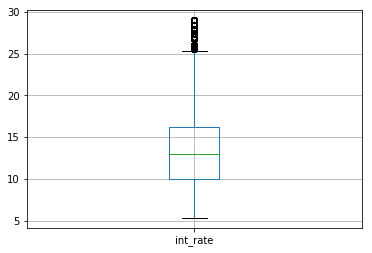

In [21]:
data.boxplot(column='int_rate')

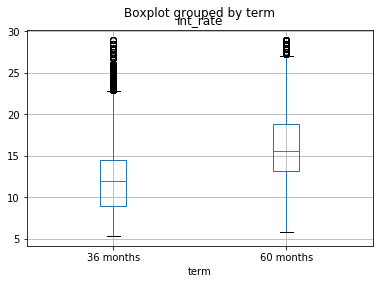

In [22]:
data.boxplot(column='int_rate', by = 'term')
# faceted by term

## 1.9 Going deeper into a variables: *loan_amnt*

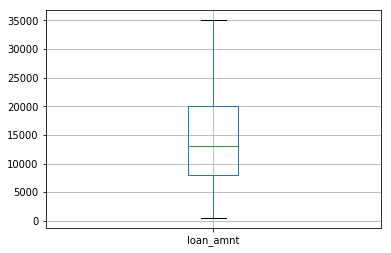

In [23]:
data.boxplot(column='loan_amnt')

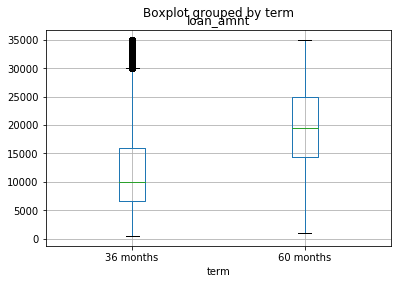

In [24]:
data.boxplot(column='loan_amnt', by='term')

## 1.10 Fixing the Dates

In [25]:
data.issue_d

0         Dec-2011
1         Dec-2011
2         Dec-2011
3         Dec-2011
4         Dec-2011
5         Dec-2011
6         Dec-2011
7         Dec-2011
8         Dec-2011
9         Dec-2011
10        Dec-2011
11        Dec-2011
12        Dec-2011
13        Dec-2011
14        Dec-2011
15        Dec-2011
16        Dec-2011
17        Dec-2011
18        Dec-2011
19        Dec-2011
20        Dec-2011
21        Dec-2011
22        Dec-2011
23        Dec-2011
24        Dec-2011
25        Dec-2011
26        Dec-2011
27        Dec-2011
28        Dec-2011
29        Dec-2011
            ...   
887349    Jan-2015
887350    Jan-2015
887351    Jan-2015
887352    Jan-2015
887353    Jan-2015
887354    Jan-2015
887355    Jan-2015
887356    Jan-2015
887357    Jan-2015
887358    Jan-2015
887359    Jan-2015
887360    Jan-2015
887361    Jan-2015
887362    Jan-2015
887363    Jan-2015
887364    Jan-2015
887365    Jan-2015
887366    Jan-2015
887367    Jan-2015
887368    Jan-2015
887369    Jan-2015
887370    Ja

In [26]:
import datetime
import datetime as dt

data.issue_d.fillna(value=np.nan, inplace=True)
issue_d_todate = pd.to_datetime(data.issue_d)
#data.issue_d = pd.Series(data.issue_d).str.replace('-2015', '')

#data.issue_d

0         Dec-2011
1         Dec-2011
2         Dec-2011
3         Dec-2011
4         Dec-2011
5         Dec-2011
6         Dec-2011
7         Dec-2011
8         Dec-2011
9         Dec-2011
10        Dec-2011
11        Dec-2011
12        Dec-2011
13        Dec-2011
14        Dec-2011
15        Dec-2011
16        Dec-2011
17        Dec-2011
18        Dec-2011
19        Dec-2011
20        Dec-2011
21        Dec-2011
22        Dec-2011
23        Dec-2011
24        Dec-2011
25        Dec-2011
26        Dec-2011
27        Dec-2011
28        Dec-2011
29        Dec-2011
            ...   
887349         Jan
887350         Jan
887351         Jan
887352         Jan
887353         Jan
887354         Jan
887355         Jan
887356         Jan
887357         Jan
887358         Jan
887359         Jan
887360         Jan
887361         Jan
887362         Jan
887363         Jan
887364         Jan
887365         Jan
887366         Jan
887367         Jan
887368         Jan
887369         Jan
887370      

In [27]:
data.earliest_cr_line.head()

0    Jan-1985
1    Apr-1999
2    Nov-2001
3    Feb-1996
4    Jan-1996
Name: earliest_cr_line, dtype: object

In [28]:
data.earliest_cr_line = pd.to_datetime(data.earliest_cr_line)
data['earliest_cr_line_year'] = data['earliest_cr_line'].dt.year

In [29]:
from pprint import pprint

pprint(data.earliest_cr_line.head())
pprint(data.earliest_cr_line_year.head())

0   1985-01-01
1   1999-04-01
2   2001-11-01
3   1996-02-01
4   1996-01-01
Name: earliest_cr_line, dtype: datetime64[ns]
0    1985.0
1    1999.0
2    2001.0
3    1996.0
4    1996.0
Name: earliest_cr_line_year, dtype: float64


## 1.11 Exploratory Visualizations

In [30]:
pd.value_counts(data['emp_length'])

10    291569
1     127700
2      78870
3      70026
5      55704
4      52529
0      44825
7      44594
8      43955
6      42950
9      34657
Name: emp_length, dtype: int64

In [31]:
pd.value_counts(data['emp_length']).to_frame()

,emp_length
10,291569
1,127700
2,78870
3,70026
5,55704
4,52529
0,44825
7,44594
8,43955
6,42950


In [32]:
pd.value_counts(data['emp_length']).to_frame().reset_index()

,index,emp_length
0,10,291569
1,1,127700
2,2,78870
3,3,70026
4,5,55704
5,4,52529
6,0,44825
7,7,44594
8,8,43955
9,6,42950


In [33]:
import seaborn as sns
import matplotlib

s = pd.value_counts(data['emp_length']).to_frame().reset_index()
s.columns = ['type', 'count']
s

,type,count
0,10,291569
1,1,127700
2,2,78870
3,3,70026
4,5,55704
5,4,52529
6,0,44825
7,7,44594
8,8,43955
9,6,42950


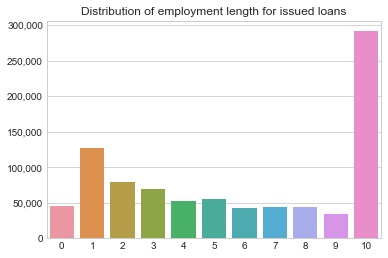

In [34]:
def emp_dur_graph(graph_title):
    sns.set_style("whitegrid")
    ax = sns.barplot(y = "count", x = 'type', data=s)
    ax.set(xlabel = '', ylabel = '', title = graph_title)
    ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    _ = ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    
emp_dur_graph('Distribution of employment length for issued loans')

### 1.11.1 Using Seaborn Stylesheets

In [35]:
print (plt.style.available)

[u'seaborn-darkgrid', u'seaborn-notebook', u'classic', u'seaborn-ticks', u'grayscale', u'bmh', u'seaborn-talk', u'dark_background', u'ggplot', u'fivethirtyeight', u'_classic_test', u'seaborn-colorblind', u'seaborn-deep', u'seaborn-whitegrid', u'seaborn-bright', u'seaborn-poster', u'seaborn-muted', u'seaborn-paper', u'seaborn-white', u'seaborn-pastel', u'seaborn-dark', u'seaborn', u'seaborn-dark-palette']


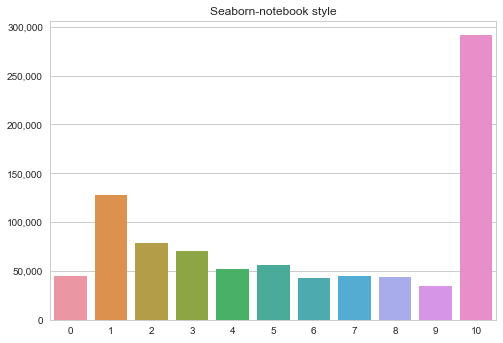

In [36]:
plt.style.use('seaborn-notebook')
ax = emp_dur_graph('Seaborn-notebook style')

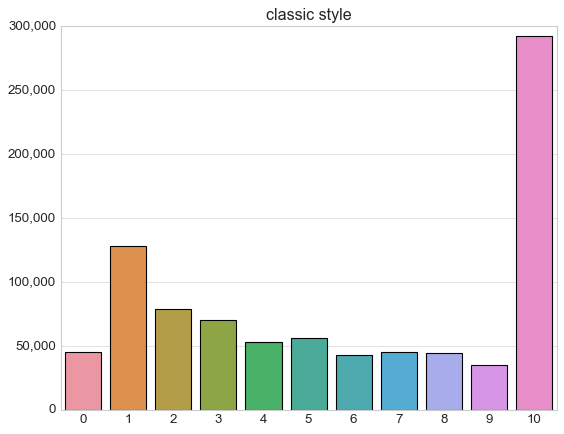

In [37]:
plt.style.use('classic')
ax = emp_dur_graph('classic style')

## 1.12 Facet Plots

In [38]:
s = pd.value_counts(data['earliest_cr_line']).to_frame().reset_index()
s.columns = ['date', 'count']
s.head()

,date,count
0,2001-08-01,6659
1,2000-08-01,6529
2,2000-10-01,6322
3,2001-10-01,6154
4,2002-08-01,6086


In [39]:
s['year'] = s['date'].dt.year
s['month'] = s['date'].dt.month
d = s[s['year'] > 2008]
pprint(s.head())
pprint(d.head())

        date  count  year  month
0 2001-08-01   6659  2001      8
1 2000-08-01   6529  2000      8
2 2000-10-01   6322  2000     10
3 2001-10-01   6154  2001     10
4 2002-08-01   6086  2002      8
          date  count  year  month
242 2009-08-01   1246  2009      8
261 2009-09-01   1037  2009      9
268 2010-08-01    973  2010      8
271 2009-10-01    965  2009     10
274 2010-09-01    947  2010      9


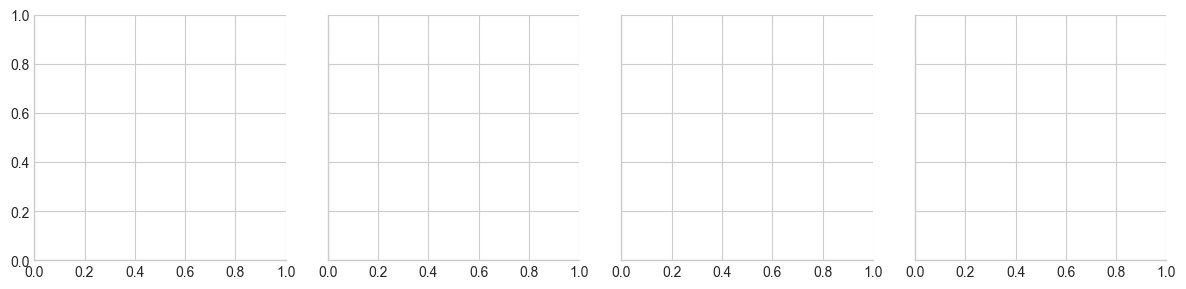

In [40]:
# https://stackoverflow.com/questions/26413185/how-to-recover-matplotlib-defaults-after-setting-stylesheet
plt.rcParams.update(plt.rcParamsDefault)
sns.set_style("whitegrid")

g = sns.FacetGrid(d, col="year")
g

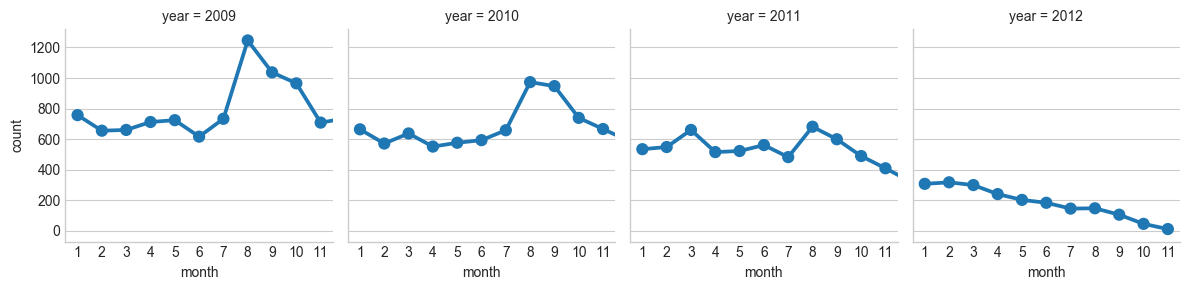

In [41]:
g = sns.FacetGrid(d, col="year")
g = g.map(sns.pointplot, "month", "count")
g

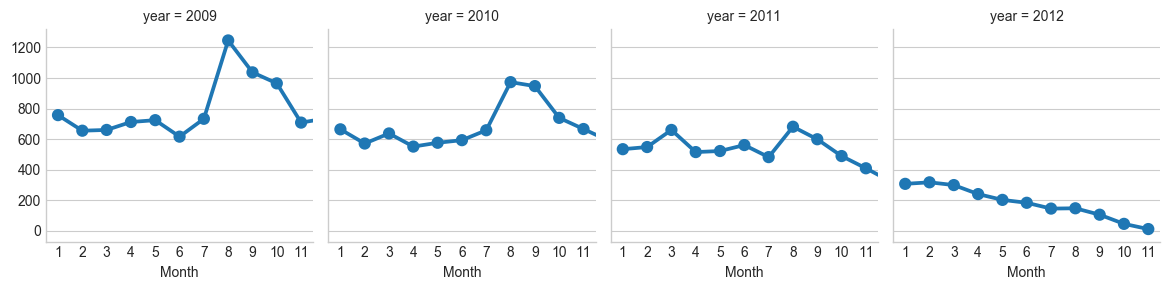

In [42]:
g = sns.FacetGrid(d, col="year")
g = g.map(sns.pointplot, "month", "count")
g.set(xlabel = 'Month', ylabel = '')
g

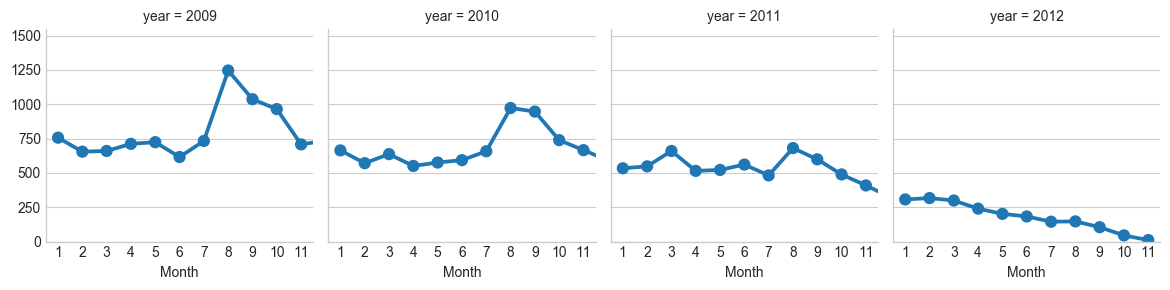

In [43]:
g = sns.FacetGrid(d, col="year")
g = g.map(sns.pointplot, "month", "count")
g.set(xlabel = 'Month', ylabel = '')
axes = plt.gca()
_ = axes.set_ylim([0, d['count'].max()+300])
g

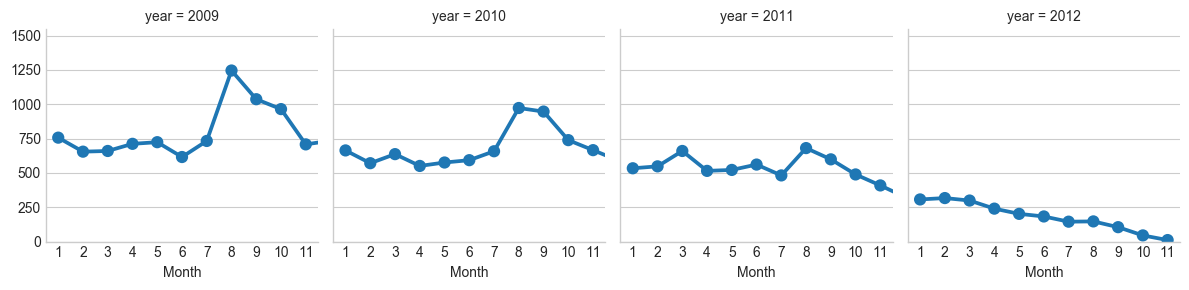

In [44]:
g = sns.FacetGrid(d, col="year")
g = g.map(sns.pointplot, "month", "count")
g.set(xlabel = 'Month', ylabel = '')
axes = plt.gca()
_ = axes.set_ylim([0, d['count'].max()+300])
plt.tight_layout()
g

## 1.13 Summary Graphs

In [45]:
group = data.groupby('grade').agg([np.mean])
group

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,earliest_cr_line_year
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,...,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
grade,,,,,,,,,,,,,,,,,,,,,
A,14038.860306,14023.323572,14000.506187,7.243312,427.599175,5.786170,86942.651653,15.577401,0.185855,0.403371,...,64.551250,1.027260,2.334143,7072.432659,49.404966,47014.290774,0.633198,1.551417,0.967341,1996.123010
B,13642.965211,13630.195062,13594.642917,10.829618,408.439291,5.783869,75487.389207,17.305115,0.308154,0.550598,...,69.538181,1.243783,2.756522,5936.938825,59.140656,32701.382733,0.778795,1.434935,1.592067,1997.296839
C,14466.306028,14458.230599,14423.251934,13.980098,421.942081,5.781868,71536.950300,18.792559,0.349268,0.742774,...,73.358110,1.474073,3.120244,5664.896613,64.175068,28450.268219,1.029860,1.541821,2.204848,1998.145139
D,15459.506278,15450.499670,15405.780441,17.175814,455.570227,5.742307,69169.272616,19.908175,0.361815,0.905060,...,76.007393,1.655491,3.411563,5300.444749,66.918064,26206.514839,1.189189,1.650359,2.741020,1998.548319
E,17998.146171,17970.831978,17907.977084,19.897322,514.993641,5.832134,72119.152229,20.338847,0.365156,1.005148,...,77.119462,1.808172,3.713989,5188.916205,67.777839,26849.450016,1.380886,1.701524,3.144737,1998.711459
F,19139.160809,19098.808904,19005.420917,23.582787,565.654337,5.908097,73801.170917,19.834316,0.370607,1.221861,...,79.773804,2.093458,4.056075,4926.726636,70.020561,25489.949626,1.595794,1.630841,3.696262,1999.006075
G,20538.563491,20497.959555,20296.247792,25.626706,627.054815,5.865185,79904.591762,19.182093,0.424303,1.516305,...,86.357831,2.272727,4.181818,3825.352273,70.452273,25553.756678,1.761364,1.284091,4.204545,1998.983057


In [46]:
loan_amt_mean = group['loan_amnt'].reset_index()
loan_amt_mean

,grade,mean
0,A,14038.860306
1,B,13642.965211
2,C,14466.306028
3,D,15459.506278
4,E,17998.146171
5,F,19139.160809
6,G,20538.563491


In [47]:
import seaborn as sns
import matplotlib

plt.style.use('fivethirtyeight')
sns.set_style("whitegrid")

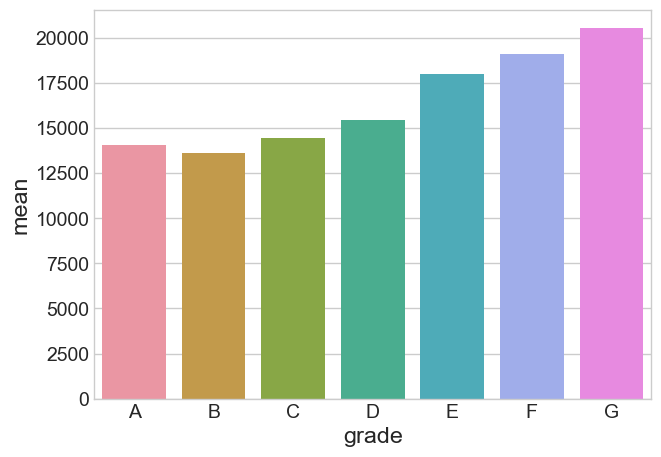

In [48]:
ax = sns.barplot(y = "mean", x = 'grade', data=loan_amt_mean)

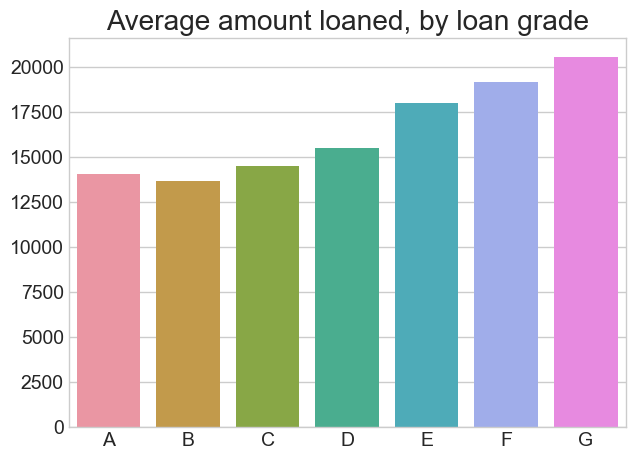

In [49]:
ax = sns.barplot(y = "mean", x = 'grade', data=loan_amt_mean)
ax.set(xlabel = '', ylabel = '', title = 'Average amount loaned, by loan grade')

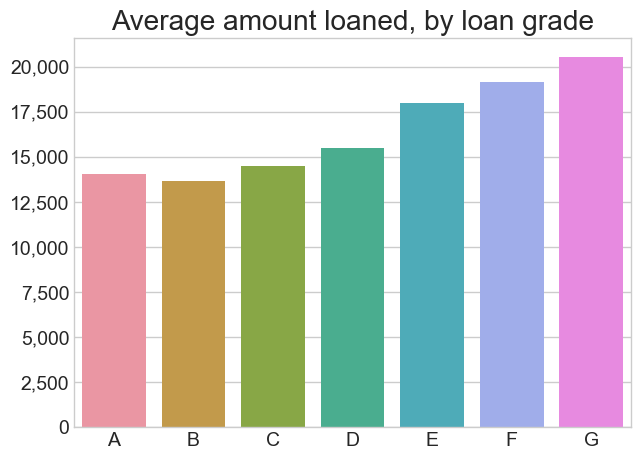

In [50]:
ax = sns.barplot(y = "mean", x = 'grade', data=loan_amt_mean)
ax.set(xlabel = '', ylabel = '', title = 'Average amount loaned, by loan grade')
ax.get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

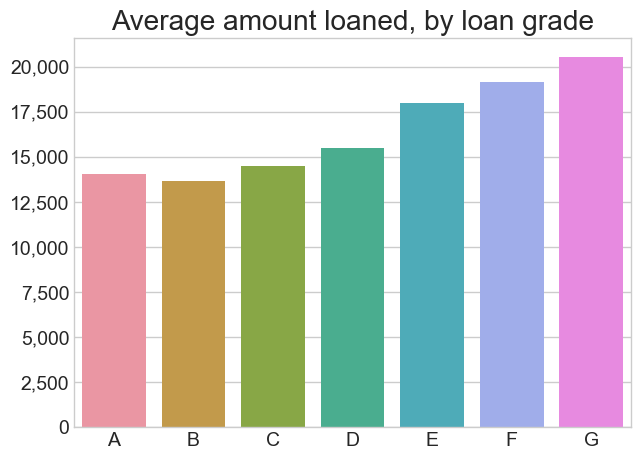

In [51]:
ax = sns.barplot(y = "mean", x = 'grade', data=loan_amt_mean)
ax.set(xlabel = '', ylabel = '', title = 'Average amount loaned, by loan grade')
ax.get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

## 1.14 Summary Graphs with Faceting

In [52]:
filtered  = data[data['earliest_cr_line_year'] > 2008]
group = filtered.groupby(['grade', 'earliest_cr_line_year']).agg([np.mean])
group

loan_amnt   funded_amnt funded_amnt_inv  \
                                     mean          mean            mean   
grade earliest_cr_line_year                                               
A     2009.0                 10719.520997  10719.520997    10717.552493   
      2010.0                 10833.776091  10833.776091    10832.115750   
      2011.0                 10743.474576  10743.474576    10741.949153   
      2012.0                 10061.153846  10061.153846    10056.923077   
B     2009.0                  9933.807465   9933.807465     9930.143377   
      2010.0                  9677.770006   9677.770006     9673.992725   
      2011.0                  9094.598888   9094.598888     9092.911041   
      2012.0                  8876.614987   8876.614987     8874.677003   
C     2009.0                  9842.134205   9842.134205     9838.643609   
      2010.0                  9582.726784   9582.726784     9579.992829   
      2011.0                  9129.803265   9129.803265     9127.040603   
      2012.0                  9043.669666   9043.669666     9040.874036   
D     2009.0                 10416.779110  10416.779110    10408.620690   
      2010.0                 10049.858116  10049.858116    10042.040295   
      2011.0                 10112.763636  10112.763636    10103.400000   
      2012.0                  9329.885057   9329.885057     9314.885057   
E     2009.0                 12600.936884  12600.936884    12591.074951   
      2010.0                 11705.980066  11705.980066    11697.120709   
      2011.0                 11365.588663  11365.588663    11355.704942   
      2012.0                 10798.367347  10798.367347    10781.428571   
F     2009.0                 12957.988981  12957.988981    12945.936639   
      2010.0                 12237.155963  12237.155963    12227.828746   
      2011.0                 12107.446809  12107.446809    12090.851064   
      2012.0                 13138.928571  13138.928571    13115.000000   
G     2009.0                 15276.013514  15276.013514    15268.243243   
      2010.0                 13372.916667  13372.916667    13364.930556   
      2011.0                 14953.614458  14953.614458    14949.096386   
      2012.0                 12292.857143  12292.857143    12257.142857   

                              int_rate installment emp_length    annual_inc  \
                                  mean        mean       mean          mean   
grade earliest_cr_line_year                                                   
A     2009.0                  7.292717  331.369003   3.400262  63755.376549   
      2010.0                  7.336546  333.216717   3.512334  66856.007154   
      2011.0                  7.230203  331.199492   3.352542  65745.622373   
      2012.0                  7.312000  311.775538   3.430769  69803.907692   
B     2009.0                 10.745112  313.454743   3.395995  55422.011115   
      2010.0                 10.726267  309.228506   3.509793  54366.878942   
      2011.0                 10.548928  290.553471   3.503574  54477.797998   
      2012.0                 10.333282  284.251912   3.416021  54076.961654   
C     2009.0                 13.780045  312.687753   3.473063  49352.753497   
      2010.0                 13.639416  307.023356   3.438150  48019.861624   
      2011.0                 13.399548  296.345350   3.377145  46690.400163   
      2012.0                 13.225643  293.656838   3.150386  47258.305913   
D     2009.0                 17.147316  329.753443   3.507246  46979.163283   
      2010.0                 16.965375  319.255482   3.371737  46499.859784   
      2011.0                 16.754102  322.547891   3.432727  46164.705927   
      2012.0                 16.798207  306.159379   3.124138  43812.261540   
E     2009.0                 19.845316  385.811262   3.470414  50237.774467   
      2010.0                 19.717984  359.245382   3.514950  46837.814718   
      2011.0                 19.484578  352.592

In [53]:
graph_df = group['int_rate'].reset_index()
graph_df

,grade,earliest_cr_line_year,mean
0,A,2009.0,7.292717
1,A,2010.0,7.336546
2,A,2011.0,7.230203
3,A,2012.0,7.312000
4,B,2009.0,10.745112
5,B,2010.0,10.726267
6,B,2011.0,10.548928
7,B,2012.0,10.333282
8,C,2009.0,13.780045
9,C,2010.0,13.639416


In [54]:
import seaborn as sns
import matplotlib

plt.style.use('fivethirtyeight')
plt.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')
sns.set_style("whitegrid")

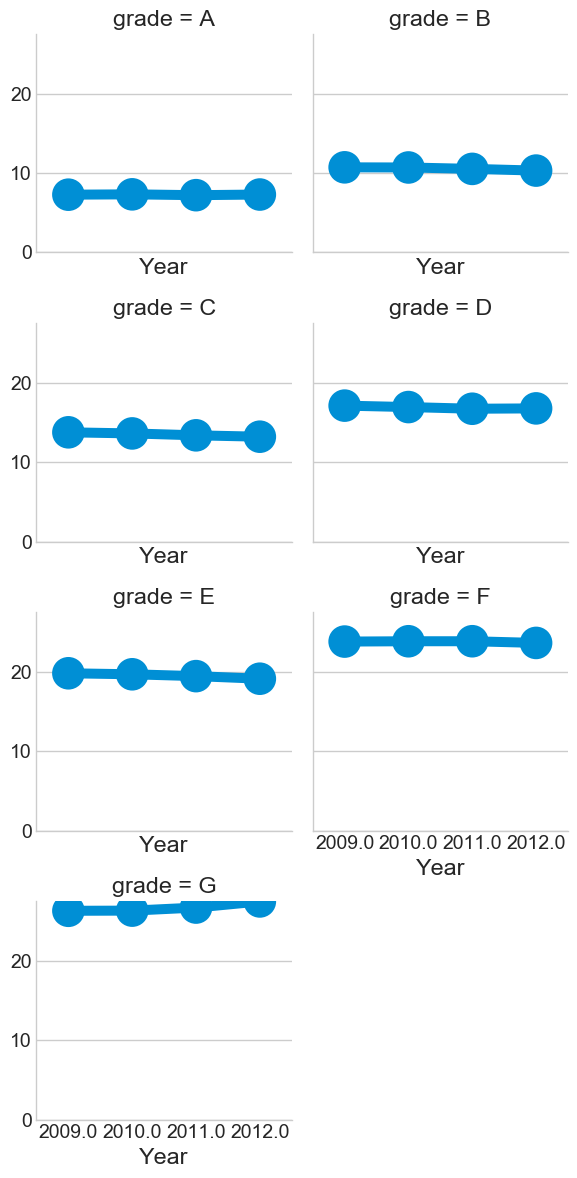

In [55]:
g = sns.FacetGrid(graph_df, col="grade", col_wrap = 2)
g = g.map(sns.pointplot, "earliest_cr_line_year", "mean")
g.set(xlabel = 'Year', ylabel = '')
axes = plt.gca()
axes.set_ylim([0, graph_df['mean'].max()])
_ = plt.tight_layout()

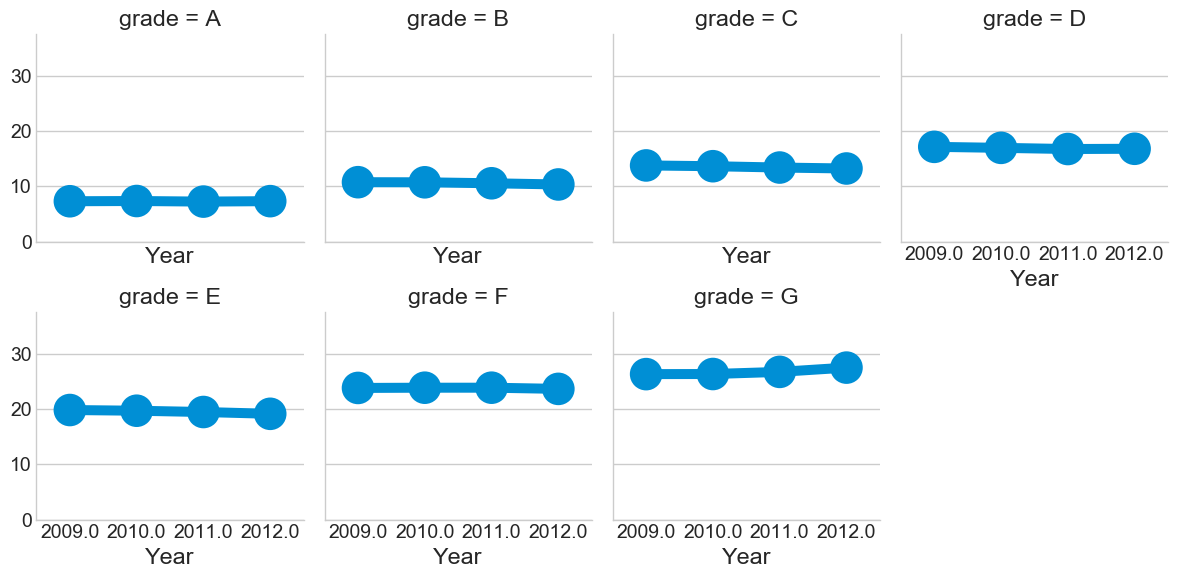

In [56]:
g = sns.FacetGrid(graph_df, col="grade", col_wrap = 4)
g = g.map(sns.pointplot, "earliest_cr_line_year", "mean")
g.set(xlabel = 'Year', ylabel = '')
axes = plt.gca()
axes.set_ylim([0, graph_df['mean'].max()+10])
_ = plt.tight_layout()

## 1.15 Missing Values

Let's look at the variables with missing values

In [57]:
data.apply(lambda x: sum(x.isnull()), axis=0)

loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_length                          0
home_ownership                      0
annual_inc                          4
verification_status                 0
issue_d                             0
purpose                             0
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        29
earliest_cr_line                   29
inq_last_6mths                     29
mths_since_last_delinq         454312
mths_since_last_record         750326
open_acc                           29
pub_rec                            29
revol_bal                           0
revol_util                        502
total_acc   

In [58]:
missing_info = data.apply(lambda x: (100.0*sum(x.isnull()))/x.shape[0], axis=0)
missing_info

loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
term                            0.000000
int_rate                        0.000000
installment                     0.000000
grade                           0.000000
sub_grade                       0.000000
emp_length                      0.000000
home_ownership                  0.000000
annual_inc                      0.000451
verification_status             0.000000
issue_d                         0.000000
purpose                         0.000000
zip_code                        0.000000
addr_state                      0.000000
dti                             0.000000
delinq_2yrs                     0.003268
earliest_cr_line                0.003268
inq_last_6mths                  0.003268
mths_since_last_delinq         51.197065
mths_since_last_record         84.555303
open_acc                        0.003268
pub_rec                         0.003268
revol_bal       

In [61]:
missing_info.value_counts

<bound method Series.value_counts of loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
term                            0.000000
int_rate                        0.000000
installment                     0.000000
grade                           0.000000
sub_grade                       0.000000
emp_length                      0.000000
home_ownership                  0.000000
annual_inc                      0.000451
verification_status             0.000000
issue_d                         0.000000
purpose                         0.000000
zip_code                        0.000000
addr_state                      0.000000
dti                             0.000000
delinq_2yrs                     0.003268
earliest_cr_line                0.003268
inq_last_6mths                  0.003268
mths_since_last_delinq         51.197065
mths_since_last_record         84.555303
open_acc                        0.003268
pub_rec             

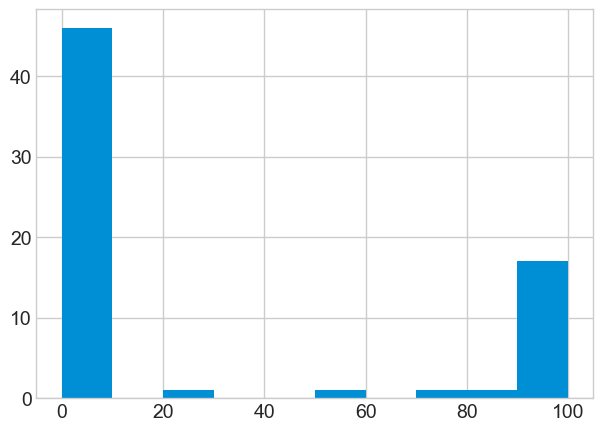

In [67]:
missing_info.hist()

In [68]:
missing_info[missing_info>=90]

annual_inc_joint             99.942415
dti_joint                    99.942640
verification_status_joint    99.942415
open_acc_6m                  97.591559
open_il_6m                   97.591559
open_il_12m                  97.591559
open_il_24m                  97.591559
mths_since_rcnt_il           97.654892
total_bal_il                 97.591559
il_util                      97.902024
open_rv_12m                  97.591559
open_rv_24m                  97.591559
max_bal_bc                   97.591559
all_util                     97.591559
inq_fi                       97.591559
total_cu_tl                  97.591559
inq_last_12m                 97.591559
dtype: float64

* Missing Value imputation is hard, because there really is no correct answer.
* A pure data science/mining approach would test each of the approaches using a CV split and include the most accurate treatment in their modelling pipeline.

We'll inspect:

- Dropping columns
- Mean imputation
- Median imputation
- Algorithmic imputation

Let's drop any column that includes "mths" in it.

In [69]:
mths = [s for s in data.columns.values if "mths" in s]
pprint(mths)

data.drop(mths, axis=1, inplace=True)

['inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'mths_since_rcnt_il']


In [70]:
#data['emp_length'].fillna(data['emp_length'].mean())
data['emp_length'].fillna(data['emp_length'].median())
data['emp_length'].fillna(data['earliest_cr_line_year'].median())

0         10
1          1
2         10
3         10
4          1
5          3
6          8
7          9
8          4
9          1
10         5
11        10
12         1
13         3
14         3
15         1
16         4
17        10
18         1
19         6
20         3
21        10
22        10
23         5
24         1
25         2
26         9
27         2
28        10
29         1
          ..
887349     2
887350    10
887351    10
887352     1
887353     4
887354    10
887355     0
887356    10
887357    10
887358     3
887359     0
887360    10
887361    10
887362     9
887363     4
887364     1
887365    10
887366     2
887367     1
887368     8
887369    10
887370     8
887371     0
887372     1
887373    10
887374     8
887375    10
887376     5
887377     1
887378    10
Name: emp_length, Length: 887379, dtype: int64

In [71]:
from sklearn.ensemble import RandomForestClassifier

rf =  RandomForestClassifier(max_depth=5, n_estimators=100, max_features=1)

data['emp_length'].replace(to_replace=0, value=np.nan, inplace=True, regex=True)
cat_variables = ['term', 'purpose', 'grade']
columns = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'grade', 'purpose', 'term']


In [72]:
def impute_missing_algo(df, target, cat_vars, cols, algo):
    y = pd.DataFrame(df[target])
    X = df[cols].copy()
    X.drop(cat_vars, axis=1, inplace=True)

    cat_vars = pd.get_dummies(df[cat_vars])

    X = pd.concat([X, cat_vars], axis = 1)

    y['null'] = y[target].isnull()
    y['null'] = y.loc[:, target].isnull()
    X['null'] = y[target].isnull()

    y_missing = y[y['null'] == True]
    y_notmissing = y[y['null'] == False]
    X_missing = X[X['null'] == True]
    X_notmissing = X[X['null'] == False]

    y_missing.loc[:, target] = ''

    dfs = [y_missing, y_notmissing, X_missing, X_notmissing]
    
    for df in dfs:
        df.drop('null', inplace = True, axis = 1)

    y_missing = y_missing.values.ravel(order='C')
    y_notmissing = y_notmissing.values.ravel(order='C')
    X_missing = X_missing.as_matrix()
    X_notmissing = X_notmissing.as_matrix()
    
    algo.fit(X_notmissing, y_notmissing)
    y_missing = algo.predict(X_missing)

    y.loc[(y['null'] == True), target] = y_missing
    y.loc[(y['null'] == False), target] = y_notmissing
    
    return(y[target])

In [73]:
data['emp_length'] = impute_missing_algo(data, 'emp_length', cat_variables, columns, rf)
data['earliest_cr_line_year'] = impute_missing_algo(data, 'earliest_cr_line_year', cat_variables, columns, rf)

/Users/soumendra/anaconda3/envs/greyatom/lib/python2.7/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/soumendra/anaconda3/envs/greyatom/lib/python2.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


## 1.16 A baseline hypothesis

* Classify the term of the loan.

If necessary, we'll work on a sample of the data

In [ ]:
# Returns a random sample of items - 30% so the dataset is easy to work with
orig = data.copy()
data = data.sample(frac = 0.3)
data.head(2)

In [78]:
from sklearn import preprocessing
from sklearn import linear_model

In [80]:
y = data.term

cols = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'grade', 'emp_length', 'purpose', 'earliest_cr_line_year']
X = pd.get_dummies(data[cols])
X

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,emp_length,earliest_cr_line_year,grade_A,grade_B,grade_C,grade_D,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,5000.0,5000.0,4975.000000,10.65,10.0,1985.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2500.0,2500.0,2500.000000,15.27,1.0,1999.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2400.0,2400.0,2400.000000,15.96,10.0,2001.0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,10000.0,10000.0,10000.000000,13.49,10.0,1996.0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,3000.0,3000.0,3000.000000,12.69,1.0,1996.0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
5,5000.0,5000.0,5000.000000,7.90,3.0,2004.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,7000.0,7000.0,7000.000000,15.96,8.0,2005.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,3000.0,3000.0,3000.000000,18.64,9.0,2007.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5600.0,5600.0,5600.000000,21.28,4.0,2004.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,5375.0,5375.0,5350.000000,12.69,1.0,2004.0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [81]:
le = preprocessing.LabelEncoder()
le.fit(y)
y = le.transform(y)
X = X.as_matrix()

In [82]:
pprint(y)

array([0, 1, 0, ..., 1, 1, 0])


In [84]:
pprint(X)

array([[  5.00000000e+03,   5.00000000e+03,   4.97500000e+03, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  2.50000000e+03,   2.50000000e+03,   2.50000000e+03, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  2.40000000e+03,   2.40000000e+03,   2.40000000e+03, ...,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       ..., 
       [  1.30000000e+04,   1.30000000e+04,   1.30000000e+04, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  1.20000000e+04,   1.20000000e+04,   1.20000000e+04, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  2.00000000e+04,   2.00000000e+04,   2.00000000e+04, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00]])


In [85]:
logistic = linear_model.LogisticRegression()

logistic.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [89]:
logistic.coef_

array([[  3.35938262e-04,  -3.75040984e-04,   1.53497757e-04,
          2.44495781e-01,   3.89185314e-02,  -3.18410890e-03,
         -9.68541651e-02,  -1.10922392e-02,   1.05670624e-01,
         -2.83788457e-02,   3.18913734e-02,  -1.18802545e-03,
          7.47329975e-05,   5.60500517e-03,   4.12345853e-02,
          2.20243918e-02,  -2.74968473e-04,   1.04559933e-02,
         -4.96891919e-03,   2.45769153e-03,  -5.79767595e-03,
         -7.50144531e-03,  -3.55356928e-02,  -7.84301503e-04,
         -1.90382812e-02,  -5.46120165e-03,  -2.29172583e-03]])

In [90]:
logistic.classes_

array([0, 1])

## 1.17 Pipelining

We'll see how we can combine multiple techniques (supervised an unsupervised) in a pipeline.
These can be useful for a number of reasons:

- You can score the output of the whole pipeline
- You can gridsearch for the whole pipeline making finding optimal parameters easier

So next we'll combine some a PCA (unsupervised) and Random Forests (supervised) to create a pipeline for modelling the data. 

In [76]:
from sklearn import linear_model, decomposition
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(max_depth=5, max_features=1)

pca = decomposition.PCA()
pipe = Pipeline(steps=[('pca', pca), ('rf', rf)])

n_comp = [3, 5]
n_est = [10, 20]

estimator = GridSearchCV(pipe,
                         dict(pca__n_components=n_comp,
                              rf__n_estimators=n_est))

estimator.fit(X, y)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('rf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=1, max_leaf_nodes=None,
            min_im...imators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'pca__n_components': [3, 5], 'rf__n_estimators': [10, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [92]:
estimator.best_score_

0.79472806996784917

In [93]:
estimator.best_estimator_

Pipeline(steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('rf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=1, max_leaf_nodes=None,
            min_impur...imators=20, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False))])

In [95]:
estimator.cv_results_

{'mean_fit_time': array([  9.92146238,  16.50785669,  10.71325032,  18.71175353]),
 'mean_score_time': array([ 0.35670098,  0.59831301,  0.33313537,  0.64398607]),
 'mean_test_score': array([ 0.72394546,  0.72342257,  0.78840495,  0.79472807]),
 'mean_train_score': array([ 0.72764568,  0.72899911,  0.7988199 ,  0.80021895]),
 'param_pca__n_components': masked_array(data = [3 3 5 5],
              mask = [False False False False],
        fill_value = ?),
 'param_rf__n_estimators': masked_array(data = [10 20 10 20],
              mask = [False False False False],
        fill_value = ?),
 'params': ({'pca__n_components': 3, 'rf__n_estimators': 10},
  {'pca__n_components': 3, 'rf__n_estimators': 20},
  {'pca__n_components': 5, 'rf__n_estimators': 10},
  {'pca__n_components': 5, 'rf__n_estimators': 20}),
 'rank_test_score': array([3, 4, 2, 1], dtype=int32),
 'split0_test_score': array([ 0.73551864,  0.7367526 ,  0.79590864,  0.79471186]),
 'split0_train_score': array([ 0.72405825,  0.7266

In [99]:
estimator.grid_scores_

/Users/soumendra/anaconda3/envs/greyatom/lib/python2.7/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.72395, std: 0.00862, params: {'pca__n_components': 3, 'rf__n_estimators': 10},
 mean: 0.72342, std: 0.00949, params: {'pca__n_components': 3, 'rf__n_estimators': 20},
 mean: 0.78840, std: 0.01040, params: {'pca__n_components': 5, 'rf__n_estimators': 10},
 mean: 0.79473, std: 0.00631, params: {'pca__n_components': 5, 'rf__n_estimators': 20}]

# 2 Misc Utility Functions

## 2.1 Imports

In [114]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals

In [118]:
2/5

0.4

## 2.2 Timing Decorator

In [117]:
import time                                                

def timeit(method):
    def timed(*args, **kw):
        ts = time.time()
        result = method(*args, **kw)
        te = time.time()
        if 'log_time' in kw:
            name = kw.get('log_name', method.__name__.upper())
            kw['log_time'][name] = int((te - ts) * 1000)
        else:
            print('%r  %2.2f ms' % \
                  (method.__name__, (te - ts) * 1000))
        return result
    return timed

In [112]:
@timeit
def f1():
    time.sleep(2)
    print 'hello'
    return(1)

In [113]:
f1()

hello
'f1'  2002.90 ms


1

## 2.3 Pickling Utilities

In [125]:
import pickle

def pickle_dump(data, filename):
    with open(filename, 'wb') as f:
        pickle.dump(data, f, protocol=pickle.HIGHEST_PROTOCOL)

def pickle_load(filename):
    with open(filename, 'rb') as f:
        # https://stackoverflow.com/questions/28218466/unpickling-a-python-2-object-with-python-3
        return pickle.load(f)

In [ ]:
def display_col_type(data):
    '''See column type distribution
       Parameters
       ----------
       data: pandas dataframe
       Return
       ------
       dataframe
    '''
    column_type = data.dtypes.reset_index()
    column_type.columns = ["count", "column type"]
    return column_type.groupby(["column type"]).agg('count').reset_index()

In [ ]:
def get_NC_col_names(data):
    '''Get column names of category and numeric
        Parameters
        ----------
        data: dataframe
        Return:
        ----------
        numerics_cols: numeric column names
        category_cols: category column names
    '''
    numerics_cols = data.select_dtypes(exclude=['O']).columns.tolist()
    category_cols = data.select_dtypes(include=['O']).columns.tolist()
    return numerics_cols, category_cols

In [ ]:
def missing_columns(data):
    '''show missing information
        Parameters
        ----------
        data: pandas dataframe
        Return
        ------
        df: pandas dataframe
    '''
    df_missing = data.isnull().sum().sort_values(ascending=False)
    df = pd.concat([pd.Series(df_missing.index.tolist()), pd.Series(df_missing.values),
                    pd.Series(data[df_missing.index].dtypes.apply(lambda x: str(x)).values),
                    pd.Series((df_missing / data.shape[0]).values)], axis=1, ignore_index=True)
    df.columns = ['col_name', 'missing_count', 'col_type', 'missing_rate']

    return df

## 2.4 Missing Value Representation

In [119]:
np.nan == np.nan #isnull

False

## 2.5 AWS Pricing

In [120]:
four = 0.047
eight = 0.094

In [121]:
def price(type):
    return type*8*5*65

In [123]:
price(four)

122.19999999999999

In [124]:
price(eight)

244.39999999999998